In [1]:
import numpy as np
import pandas as pd
import sklearn
import tensorflow as tf
import matplotlib.pyplot as plt

In [23]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report

In [13]:
def load_data_from_folders(base_dir, img_size=(128, 128)):
    images = []
    labels = []
    for label, category in enumerate(["infected", "notinfected"]):  # Assign 0 to 'infected', 1 to 'noninfected'
        category_path = os.path.join(base_dir, category)
        for img_name in os.listdir(category_path):
            img_path = os.path.join(category_path, img_name)
            img = cv2.imread(img_path)
            if img is not None:
                img = cv2.resize(img, img_size)  # Resize image
                images.append(img)
                labels.append(label)
    images = np.array(images) / 255.0  # Normalize pixel values to [0, 1]
    labels = np.array(labels)
    return images, labels

In [14]:
data_dir = os.path.expanduser("~/downloads/data")  # Path to the dataset
train_dir = os.path.join(data_dir, "train")
test_dir = os.path.join(data_dir, "test")
img_size = (128, 128)

In [15]:
X_train, y_train = load_data_from_folders(train_dir, img_size)
X_test, y_test = load_data_from_folders(test_dir, img_size)

In [16]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [17]:
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [18]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.2),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.3),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.4),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(y_train.shape[1], activation='softmax') 
])

2025-01-25 14:27:10.587526: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1
2025-01-25 14:27:10.587720: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2025-01-25 14:27:10.587877: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2025-01-25 14:27:10.588394: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:303] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-01-25 14:27:10.588763: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:269] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [19]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [20]:
history = model.fit(
    datagen.flow(X_train, y_train, batch_size=32),
    validation_data=(X_test, y_test),
    epochs=20,
    verbose=1
)

Epoch 1/20


2025-01-25 14:28:01.996625: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


61/61 [==============================] - ETA: 0s - loss: 0.7428 - accuracy: 0.6658

2025-01-25 14:28:17.550260: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


61/61 [==============================] - 18s 199ms/step - loss: 0.7428 - accuracy: 0.6658 - val_loss: 0.2965 - val_accuracy: 0.8689
Epoch 2/20
61/61 [==============================] - 10s 162ms/step - loss: 0.1626 - accuracy: 0.9350 - val_loss: 0.0232 - val_accuracy: 0.9969
Epoch 3/20
61/61 [==============================] - 10s 162ms/step - loss: 0.0432 - accuracy: 0.9870 - val_loss: 0.0024 - val_accuracy: 1.0000
Epoch 4/20
61/61 [==============================] - 11s 176ms/step - loss: 0.0282 - accuracy: 0.9906 - val_loss: 0.0031 - val_accuracy: 1.0000
Epoch 5/20
61/61 [==============================] - 11s 178ms/step - loss: 0.0165 - accuracy: 0.9958 - val_loss: 0.0010 - val_accuracy: 1.0000
Epoch 6/20
61/61 [==============================] - 10s 165ms/step - loss: 0.0085 - accuracy: 0.9964 - val_loss: 2.3408e-04 - val_accuracy: 1.0000
Epoch 7/20
61/61 [==============================] - 10s 161ms/step - loss: 0.0081 - accuracy: 0.9979 - val_loss: 3.1709e-04 - val_accuracy: 1.0000
Ep

In [21]:
val_loss, val_acc = model.evaluate(X_test, y_test)
print(f"Validation Accuracy: {val_acc * 100:.2f}%")

61/61 [==============================] - 2s 24ms/step - loss: 0.0023 - accuracy: 0.9995
Validation Accuracy: 99.95%


In [24]:
y_pred = np.argmax(model.predict(X_test), axis=1)
y_true = np.argmax(y_test, axis=1)
print("\nClassification Report:\n")
print(classification_report(y_true, y_pred, target_names=["infected", "notinfected"]))

61/61 [==============================] - 1s 17ms/step

Classification Report:

              precision    recall  f1-score   support

    infected       1.00      1.00      1.00       781
 notinfected       1.00      1.00      1.00      1141

    accuracy                           1.00      1922
   macro avg       1.00      1.00      1.00      1922
weighted avg       1.00      1.00      1.00      1922



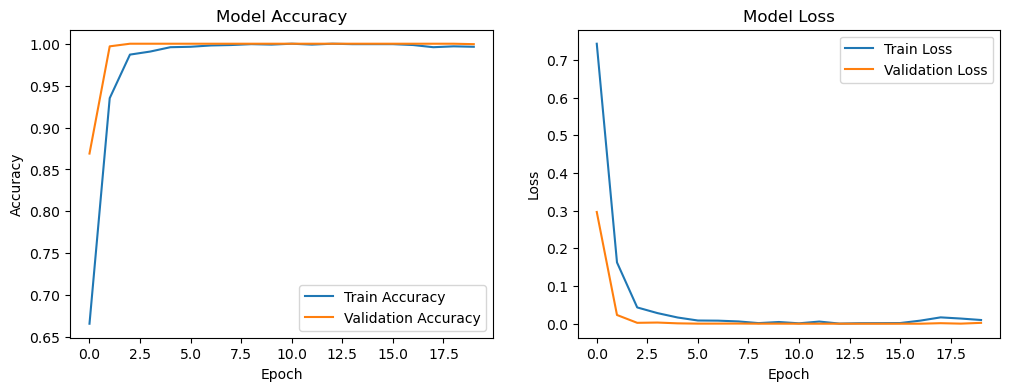

In [27]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [25]:
model.save("pcos_detection_model.h5")
print("Model saved as 'pcos_detection_model.h5'")

Model saved as 'pcos_detection_model.h5'


/Users/rs_en/tensorflow-test/env/lib/python3.8/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [6]:
pip install opencv-python

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.3/37.3 MB 1.7 MB/s eta 0:00:0000:0100:01m
Note: you may need to restart the kernel to use updated packages.
